# imports

In [1]:
import random as r
import matplotlib
import matplotlib.pyplot as plt


<div class = 'alert alert-info alert-success'> 
   
   Simulating Gambling Odds:
    
   1-50: The House Wins
    
   51-99: You Win
    
   100: The House Wins
    
   The house has a 1% edge winning over you. Overtime this amplifies and will become evident.
    
</div>

# Dice Rolling Function

In [2]:
def rollDice():
    # produce some number between 1 and 100
    roll = r.randint(1,100)
    
    if roll == 100:
        #print(roll)
        #print("You Lose.")
        #print('------')
        #print('\n')
        
        return False
    
    elif roll <= 50:
        #print(roll)
        #print("You Lose.")
        #print('------')
        #print('\n')
        
        return False
        
    elif 100 > roll > 50:
        #print(roll)
        #print("You Win.")
        #print('------')
        #print('\n')
        
        return True
    

In [40]:
# testing the function
x = 0
while x < 5:
    results = rollDice()
    
    x += 1

# Simple Betting Function

In [12]:
def simple_bettor(funds,initial_wager,wager_count):
   
    global broke_count
    
    value = funds
    wager = initial_wager
    currentWager = 1
    
    wX = []
    vY = []
    
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            # Append to list
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

            ###add me
            if value < 0:
                currentWager += 10000000000000000
                broke_count += 1
        currentWager += 1
    plt.plot(wX,vY,'c')

# 10 bets

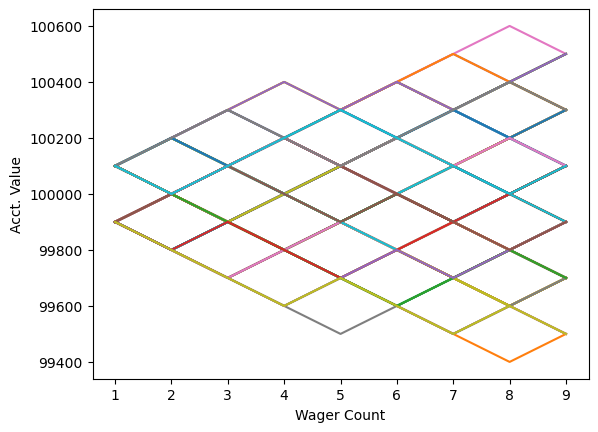

In [103]:
# test function
# I'm betting 100000 dollars in 100 dollar increments, 10 times.
x = 0 
while x < 100:
    
    simpleBetter(100000, 100, 10)
    x+=1 
    
    plt.ylabel('Acct. Value')
    plt.xlabel('Wager Count')

    

# 1000 bets

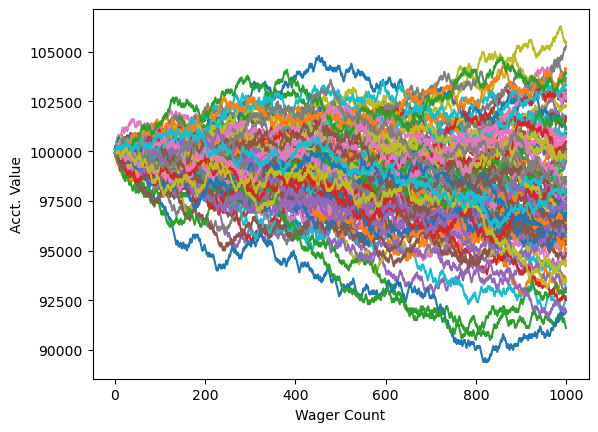

In [98]:
# I'm betting 100000 dollars in 100 dollar increments, 1000 times.
x = 0 
while x < 100:
    
    simpleBetter(100000, 100, 1000)
    x+=1 
    
    plt.ylabel('Acct. Value')
    plt.xlabel('Wager Count')

    

# 100000 bets

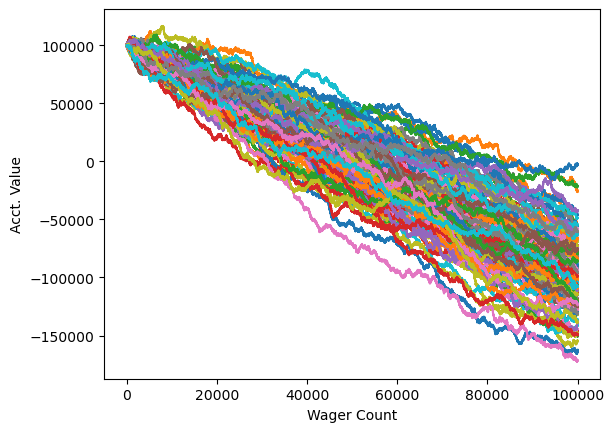

In [104]:
# I'm betting 100000 dollars in 100 dollar increments, 100000 times.
x = 0 
while x < 100:
    
    simpleBetter(100000, 100, 100000)
    x+=1 
    
    plt.ylabel('Acct. Value')
    plt.xlabel('Wager Count')

    

# Doubling Up

In [21]:
def doubler_bettor(funds, init_wager, wager_count):
    
    # global variable
    global broke_count
    
    value = funds
    wager = init_wager
    
    current_wager = 1

    xW = []
    vY = []
    
    previous_wager = 'win'
    previous_wager_amount = init_wager
       
    while current_wager < wager_count:
        if previous_wager == 'win':
            if rollDice():
                value += wager
                # Append to list
                xW.append(current_wager)
                vY.append(value)
                wager = init_wager  # Revert back to initial wager after a win
            else:
                value -= wager
                previous_wager = 'loss'
                previous_wager_amount = wager

                # Append to list
                xW.append(current_wager)
                vY.append(value)
                if value < 0:
                    
                    #print(f'We went broke after {current_wager} bets')
                    broke_count +=1 
                    break

        elif previous_wager == 'loss':
            if rollDice():
                wager = previous_wager_amount * 2
                value += wager

                # Revert back to initial wager after a win
                wager = init_wager
                previous_wager = 'win'

                # Append to list
                xW.append(current_wager)
                vY.append(value)
            else:
                wager = previous_wager_amount * 2
                value -= wager

                if value < 0:
                    #print(f'We went broke after {current_wager} bets')
                    broke_count +=1 
                    break

                previous_wager = 'loss'
                previous_wager_amount = wager

                # Append to list
                xW.append(current_wager)
                vY.append(value)

        current_wager += 1

        if current_wager > wager_count:
            break

    plt.plot(xW, vY,'g')
    #plt.show()


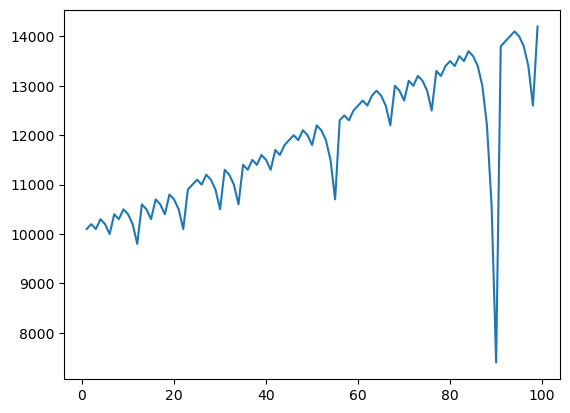

In [89]:
doubler_bettor(10000, 100,100)

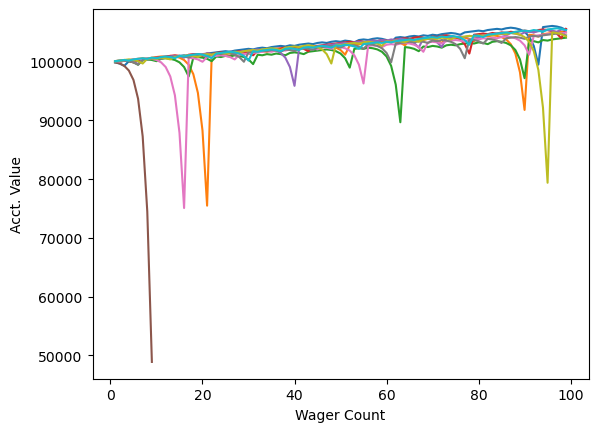

In [92]:
# I'm betting 100000 dollars in 100 dollar increments, 100 times.
x = 0 
while x < 10:
    
    doubler_bettor(100000, 100, 100)
    x+=1 
    
    plt.ylabel('Acct. Value')
    plt.xlabel('Wager Count')


Death Rate: 28.499999999999996
Survival Rate: 71.5


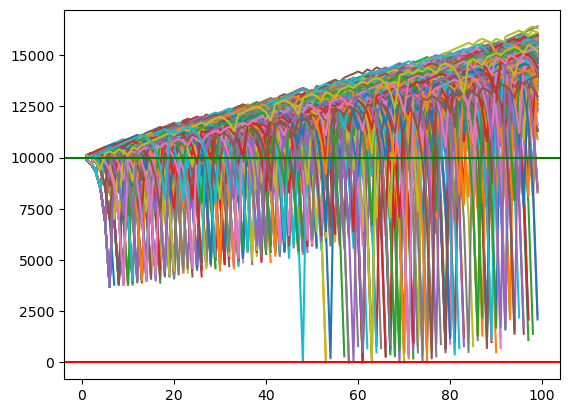

In [16]:
xx = 0
broke_count = 0

# 100 examples
while xx < 1000:
    doubler_bettor(10000, 100, 100)
    xx += 1
    
print('Death Rate:', (broke_count / float(xx)) * 100)
print('Survival Rate:', 100 - (broke_count/ float(xx)) * 100)

plt.axhline(0, color='red')
plt.axhline(10000, color='green')

plt.show()


# Compare Simple Better to Doubling Up

In [17]:
sample_size = 100
starting_funds = 10000
wager_size = 100
wager_count = 1000

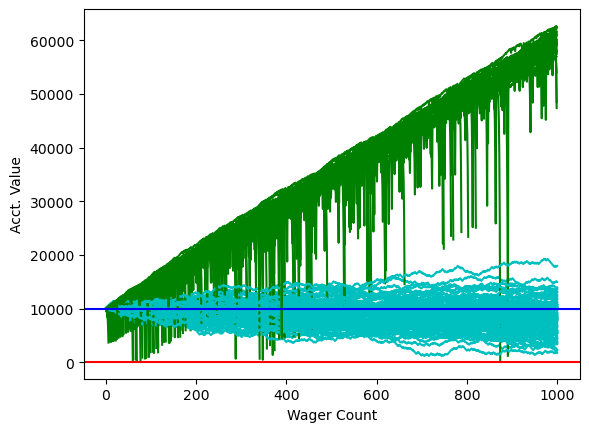

In [24]:
x = 0
broke_count = 0

while x < sample_size:
    simple_bettor(starting_funds,wager_size,wager_count)
    doubler_bettor(starting_funds,wager_size,wager_count)

    x += 1
    
        
#print('Death Rate:', (broke_count / float(x)) * 100)
#print('Survival Rate:', 100 - (broke_count/ float(x)) * 100)

plt.axhline(0, color='red')
plt.axhline(10000, color='blue')

plt.ylabel('Acct. Value')
plt.xlabel('Wager Count')
plt.show()

        

<div class = 'alert alert-info alert-failure'> 

I could start uploading this into a pandas dataframe and explore for some analysis

</div>

<div class="alert alert-block alert-danger">
An example of how the small percent advantage will out perform you overtime.

In [44]:
def simpleBetterE(funds, init_wager, wager_count):
    value = funds
    wager = init_wager
    
    current_wager = 0
    
    
    while current_wager < wager_count:
        # if True, we win add value up.
        if rollDice():
            value += wager
            # else false, take value away.
        else:
            value -= wager
        
        # move counter up
        current_wager += 1
    
    if value < 0:
        value = 'broke'
        
    print(f'funds:{value}')
    

In [45]:
# test function
# I'm betting 100 dollars in 10 dollar increments, 10 times.
x = 0 
while x < 100:
    
    simpleBetterE(100, 10, 1000)
    x+=1 

funds:broke
funds:220
funds:200
funds:200
funds:broke
funds:220
funds:broke
funds:240
funds:80
funds:broke
funds:broke
funds:broke
funds:0
funds:broke
funds:broke
funds:380
funds:broke
funds:broke
funds:broke
funds:broke
funds:broke
funds:440
funds:220
funds:200
funds:60
funds:broke
funds:broke
funds:100
funds:broke
funds:60
funds:broke
funds:broke
funds:20
funds:120
funds:broke
funds:120
funds:broke
funds:40
funds:broke
funds:broke
funds:400
funds:120
funds:140
funds:260
funds:80
funds:broke
funds:broke
funds:620
funds:broke
funds:broke
funds:260
funds:240
funds:broke
funds:broke
funds:broke
funds:broke
funds:broke
funds:580
funds:80
funds:broke
funds:140
funds:broke
funds:20
funds:broke
funds:260
funds:broke
funds:broke
funds:broke
funds:broke
funds:broke
funds:broke
funds:broke
funds:broke
funds:80
funds:broke
funds:broke
funds:broke
funds:broke
funds:0
funds:broke
funds:300
funds:320
funds:broke
funds:0
funds:broke
funds:broke
funds:broke
funds:280
funds:broke
funds:80
funds:broke
